In [194]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [195]:
#df = pd.read_csv("./archive/data.csv")
df = pd.read_csv("./archive/bank.csv")

In [196]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [197]:
df.shape

(11162, 17)

In [198]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [200]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

Age - Age of the customer - Integer value
job - Job of the customer - Categorical feature
marital - Marital status of the customer- Categorical feature
education - eduction status - categorical feature
default - whether the custome is defaulter or not - categorical feature
balance - yearly account balance of the customer - continueous feature
housing - housing status of the customer - categorical feature
loan - whether the customer availed any loans - categorical feature
contact - how many times the customer has been contacted - categorical feature
pday - day from last contact - discrete feature
pmonth - month from last contacted date - categorical feature.
duration - duration of last contact in hours - continuous feature
campaign - contact with how many campaign - categorical feature

In [201]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [202]:
from matplotlib.gridspec import GridSpec
cols= ['#00876c','#85b96f','#f7e382','#f19452','#d43d51']

Text(60, 0.3, 'Frequent age no: 31.00')

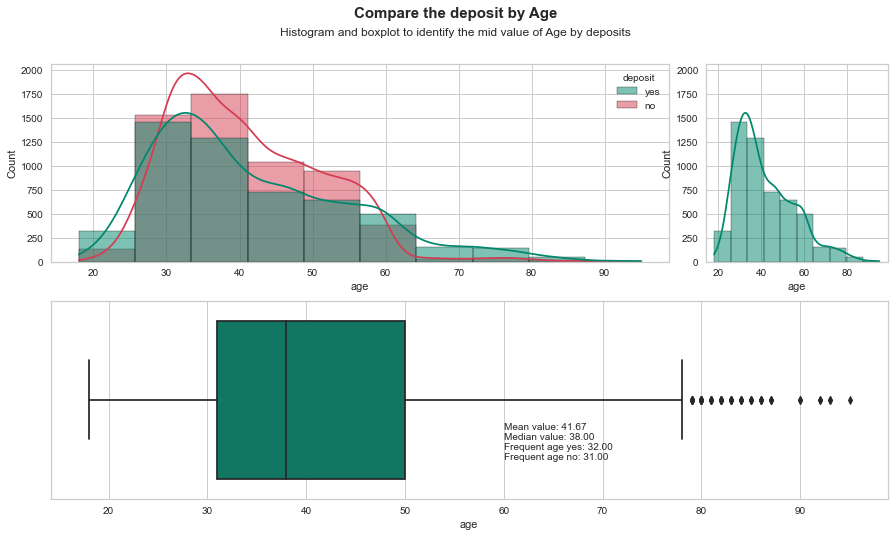

In [203]:
fig=plt.figure(figsize=(15,8), edgecolor='black')
plt.suptitle("Compare the deposit by Age", size=15,weight='bold')

plt.figtext(0.5,0.93,"Histogram and boxplot to identify the mid value of Age by deposits", size=12, ha='center')
gs = GridSpec(nrows=2, ncols=4, figure=fig)
ax1=plt.subplot(gs[0,:3])


sns.histplot(data=df, x='age', bins=10, ax=ax1, kde=True, hue='deposit', palette=['#00876c','#d43d51']);
ax2=plt.subplot(gs[0,3:4], sharey=ax1)
sns.histplot(data=df[df['deposit']=='yes'], x='age', bins=10, ax=ax2, kde=True, color=['#00876c']);
# ax2.yaxis.set_visible(False)



ax4=plt.subplot(gs[1,:4])
sns.boxplot(data=df[df['deposit']=='yes'], x='age', ax=ax4, palette=['#00876c']);
ax4.text(60,0.15,"Mean value: {:.2f}".format(df[df['deposit']=='yes']['age'].mean()))
ax4.text(60,0.20,"Median value: {:.2f}".format(df[df['deposit']=='yes']['age'].median()))
ax4.text(60,0.25,"Frequent age yes: {:.2f}".format(df[df['deposit']=='yes']['age'].mode().max()))
ax4.text(60,0.3,"Frequent age no: {:.2f}".format(df[df['deposit']=='no']['age'].mode().max()))


Observation: Interesting outcome from the above graph. deposit starts at the age of 20+ and peak is between 30, 50.
frequently deposit age is 32. 
In addition Non deposite age is between 30-50 years with mean is around 35-40 years

Text(0.05, -0.05, "Observation:\n Obivous that the single's deposit is less compared to married & divorced.\n Married average age starts from 35+ to 60.\n divorced ages is between 40 to 60 & singel ages is between 28 to 35.\n Reason could be that the single might get married after 35 years approximately")

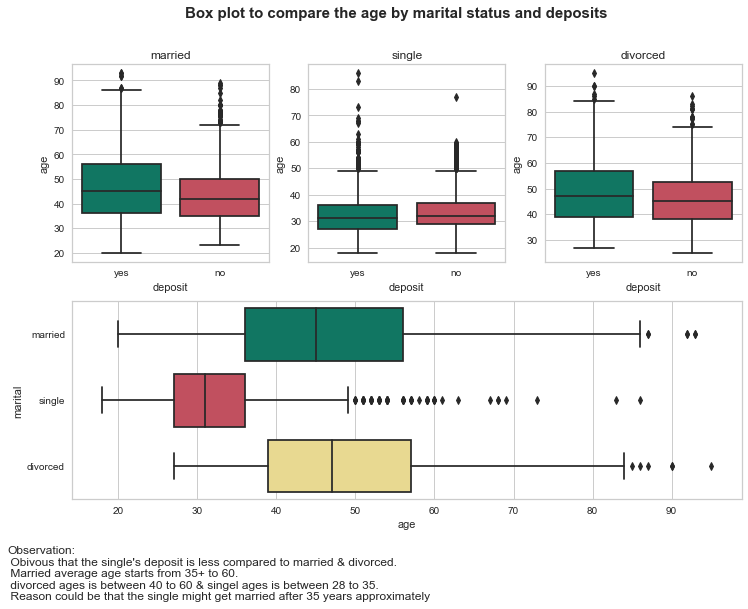

In [204]:
fig = plt.figure(figsize=(12,8))
gs = GridSpec(ncols=3, nrows=2, figure=fig)
plt.suptitle("Box plot to compare the age by marital status and deposits", weight='bold', size=15)
for i,c in enumerate(df['marital'].unique()):
    ax=plt.subplot(gs[0,i])
    ax=sns.boxplot(y=df[df['marital']==c]['age'], x=df['deposit'],palette=['#00876c','#d43d51']).set_title(c);


ax=plt.subplot(gs[1,:])
ax=sns.boxplot(data=df[df['deposit']=='yes'],y='marital',x='age', palette=['#00876c','#d43d51','#f7e382'])

plt.figtext(0.05,-0.05,"Observation:\n Obivous that the single's deposit is less compared to married & divorced.\n Married average age starts from 35+ to 60.\n divorced ages is between 40 to 60 & singel ages is between 28 to 35.\n Reason could be that the single might get married after 35 years approximately",size=12, ha='left')

In [205]:
df[(df['marital']=='married')].deposit.value_counts()

no     3596
yes    2755
Name: deposit, dtype: int64

In [206]:
df[(df['marital']=='married') & (df['age']>=60)].deposit.value_counts()

yes    469
no     137
Name: deposit, dtype: int64

In [207]:
df[(df['marital']=='single')].deposit.value_counts()

yes    1912
no     1606
Name: deposit, dtype: int64

In [208]:
df[(df['marital']=='single') & (df['age']>=60)].deposit.value_counts()

yes    13
no      2
Name: deposit, dtype: int64

In [209]:
df[(df['marital']=='divorced')].deposit.value_counts()

no     671
yes    622
Name: deposit, dtype: int64

In [156]:
df[(df['marital']=='divorced') & (df['age']>=60)].deposit.value_counts()

yes    118
no      41
Name: deposit, dtype: int64

In [157]:
for i,c in enumerate(df['marital'].unique()):
    print(i,c)

0 married
1 single
2 divorced


Text(0.05, -0.05, 'Observation: People who has loan, have not deposited')

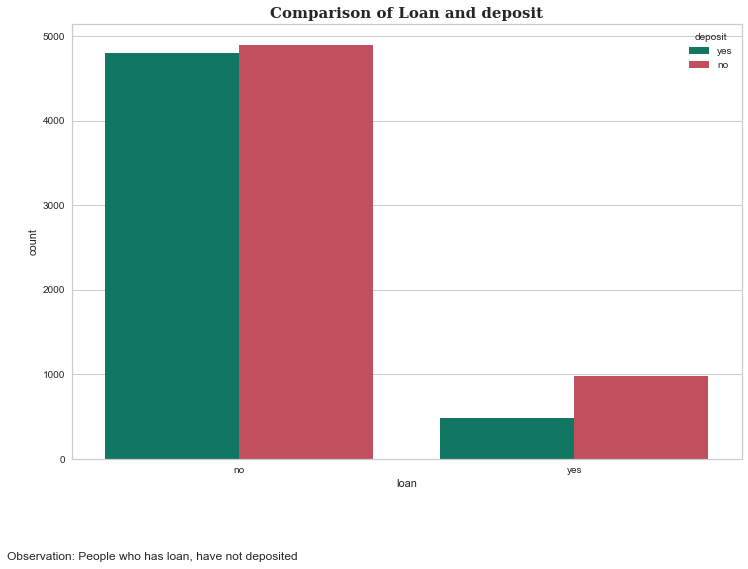

In [158]:
fig = plt.figure(figsize=(12,8))
ax=sns.countplot(data=df, x='loan', hue='deposit', palette=['#00876c','#d43d51'])
ax.set_title('Comparison of Loan and deposit', font='Serif', weight='bold', size=15)
plt.figtext(0.05,-0.05,"Observation: People who has loan, have not deposited",
 size=12, ha='left')

Text(0.05, -0.05, 'Observation:\n Loan has bigger impact on the deposits, people who has loans has less deposits.\n people deposited with loan is between the age of 30 to 50. people deposited without loan is from 30 to 60 year. so people getting olde preferes deposits than the loan')

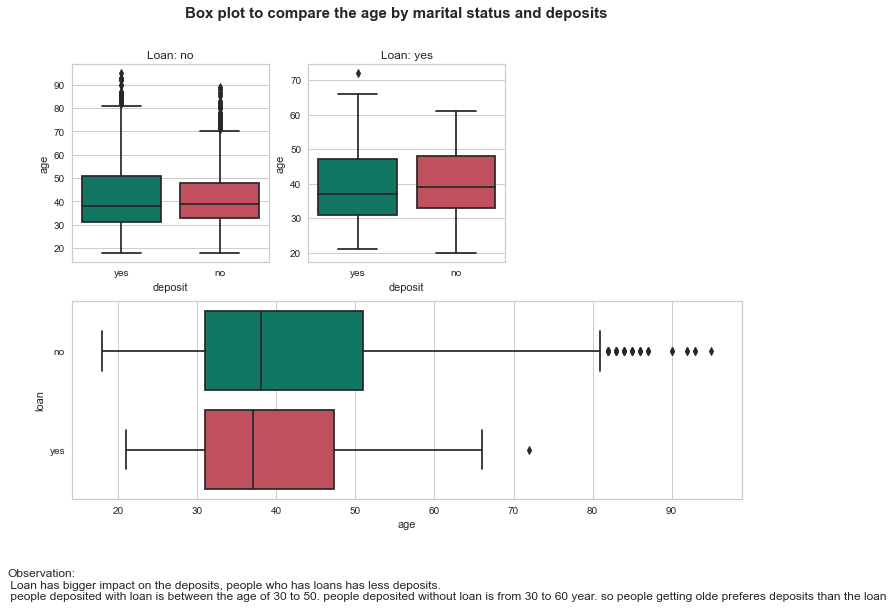

In [159]:
fig = plt.figure(figsize=(12,8))
gs = GridSpec(ncols=3, nrows=2, figure=fig)
plt.suptitle("Box plot to compare the age by marital status and deposits", weight='bold', size=15)
for i,c in enumerate(df['loan'].unique()):
    ax=plt.subplot(gs[0,i])
    ax=sns.boxplot(y=df[df['loan']==c]['age'], x=df['deposit'],palette=['#00876c','#d43d51']).set_title('Loan: '+c);
    
ax=plt.subplot(gs[1,:])
ax=sns.boxplot(data=df[df['deposit']=='yes'],y='loan',x='age', palette=['#00876c','#d43d51','#f7e382'])
plt.figtext(0.05,-0.05,"Observation:\n Loan has bigger impact on the deposits, people who has loans has less deposits.\n people deposited with loan is between the age of 30 to 50. people deposited without loan is from 30 to 60 year. so people getting olde preferes deposits than the loan", size=12, ha='left')

In [160]:
df[(df['loan']=='yes')].deposit.value_counts()

no     976
yes    484
Name: deposit, dtype: int64

In [161]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [162]:
df.groupby(['loan']).describe()['age']

,count,mean,std,min,25%,50%,75%,max
loan,,,,,,,,
no,9702.0,41.377139,12.196502,18.0,32.0,39.0,49.0,95.0
yes,1460.0,40.267123,9.775752,20.0,32.0,39.0,48.0,72.0


(0.0, 4000.0)

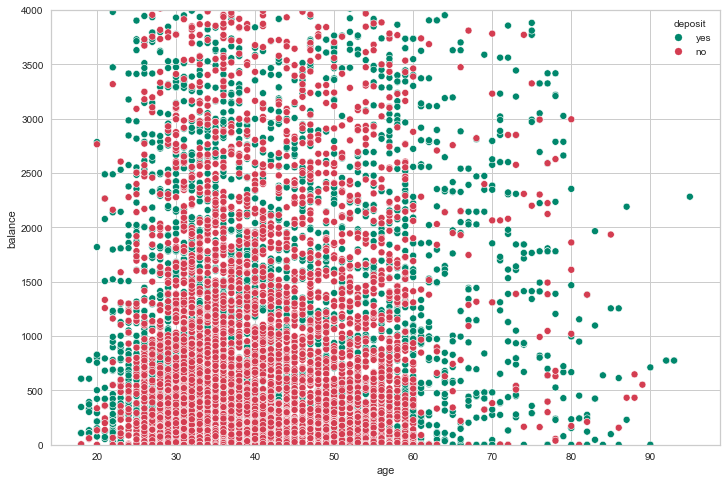

In [163]:
fig = plt.figure(figsize=(12,8))
ax=sns.scatterplot(data=df, x='age',y='balance', hue='deposit',palette=['#00876c','#d43d51'])
ax.set_ylim(0,4000)

Text(0.05, -0.05, 'Observation: Balance in deposit increases by Age')

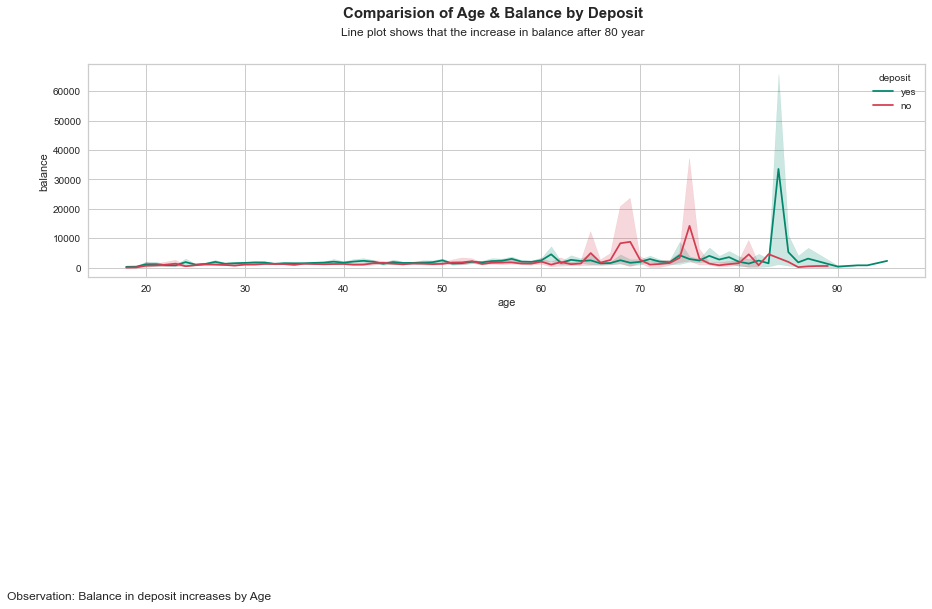

In [164]:
fig=plt.figure(figsize=(15,8))

plt.suptitle("Comparision of Age & Balance by Deposit", size=15, ha='center', weight='bold')
plt.figtext(0.5,0.93,"Line plot shows that the increase in balance after 80 year", size=12, ha='center')
gs = GridSpec(nrows=3, ncols=1, height_ratios=[5,2,2])
ax1=plt.subplot(gs[0,0])
ax1=sns.lineplot(data=df,y='balance',x='age', hue='deposit',palette=['#00876c','#d43d51'])
plt.figtext(0.05,-0.05,"Observation: Balance in deposit increases by Age", size=12, ha='left')

In [165]:
df.groupby(['age'])['balance'].mean().nlargest(5).to_frame().T

age,84,75,85,61,74
balance,33561.6,4796.722222,4602.8,4043.606061,3965.222222


In [166]:
df[(df['balance']>=4000)].deposit.value_counts()

yes    618
no     460
Name: deposit, dtype: int64

In [167]:
df[(df['balance']<=100)].deposit.value_counts()

no     1669
yes     918
Name: deposit, dtype: int64

In [168]:
df[(df['balance']>=4000) & (df['age']<=50)].deposit.value_counts()

yes    411
no     332
Name: deposit, dtype: int64

In [169]:
df[(df['balance']>=4000) & (df['age']<=50)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes
61,41,blue-collar,divorced,secondary,no,5291,yes,no,unknown,14,may,1423,3,-1,0,unknown,yes
69,44,technician,married,tertiary,no,4580,yes,no,unknown,15,may,911,2,-1,0,unknown,yes
71,29,management,married,tertiary,no,10576,no,no,unknown,15,may,1224,2,-1,0,unknown,yes
98,36,blue-collar,married,secondary,no,4438,yes,no,unknown,20,may,446,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11024,32,admin.,single,secondary,no,4344,yes,no,cellular,17,nov,79,2,118,3,failure,no
11030,34,technician,single,secondary,no,18777,yes,no,cellular,18,nov,535,1,-1,0,unknown,no
11055,41,self-employed,divorced,tertiary,no,4418,yes,no,cellular,21,nov,855,3,-1,0,unknown,no
11073,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no


In [170]:
max(df[df['age']<=50].balance.value_counts())

588

In [171]:
len(df.balance.unique())

3805

In [172]:
max(df[df['age']<=20].balance.values)

6991

<AxesSubplot:xlabel='campaign', ylabel='count'>

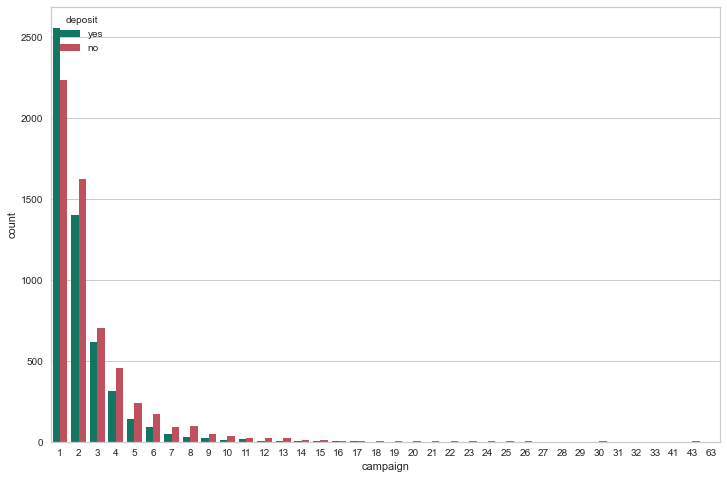

In [173]:
fig=plt.figure(figsize=(12,8))
sns.countplot(data=df,x='campaign',hue='deposit', palette=['#00876c','#d43d51'])

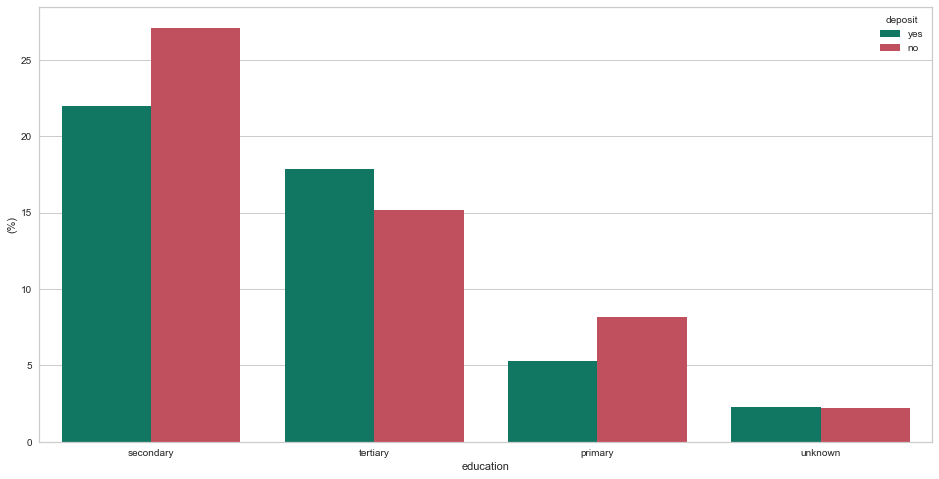

In [174]:
f, ax = plt.subplots(1, figsize=(16,8))

palette = ['#00876c','#d43d51']
sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="(%)")
ax.set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

Text(0.05, -0.05, 'Observation: Education level Secondary & Tertiary has higher balance')

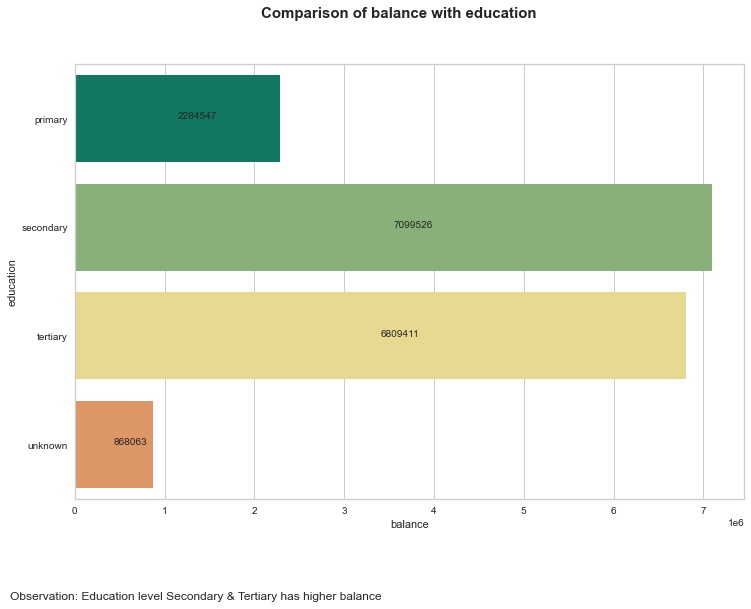

In [175]:
fig = plt.figure(figsize=(12,8))
df1=df.groupby('education')['balance'].sum().reset_index()
plt.suptitle("Comparison of balance with education", size=15, ha='center', weight='bold')

ax=sns.barplot(data=df1, y='education',x='balance', palette=cols, ci=False)



for y,x in enumerate(df1['balance']):
    ax.text(x=x/2,y=y, s=x)

plt.figtext(0.05,-0.05,"Observation: Education level Secondary & Tertiary has higher balance",
        size=12, ha='left')

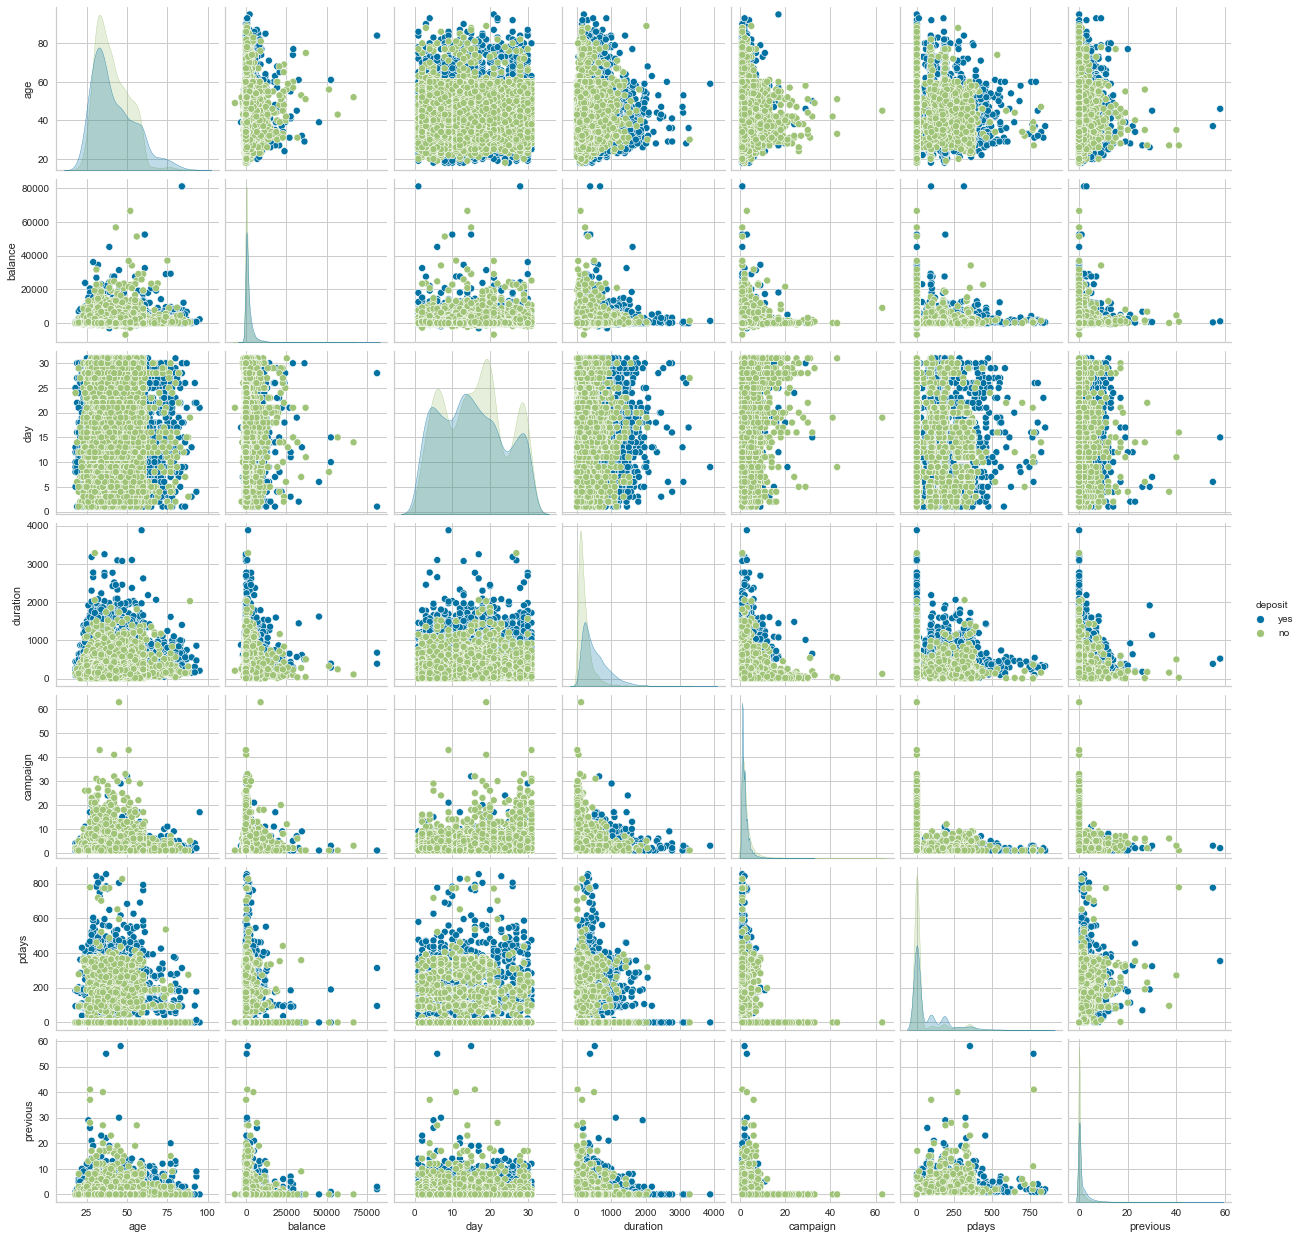

In [176]:
sns.pairplot(df, hue='deposit')

<AxesSubplot:>

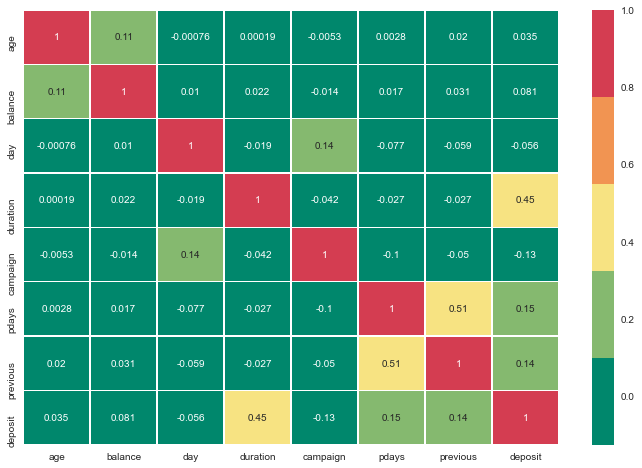

In [210]:
df['deposit']=df['deposit'].map({'no': 0, 'yes': 1})
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap=cols, annot=True, linewidths=0.5)

In [178]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [179]:
# df['deposit']=df['deposit'].map({'yes':1,'no':0})

In [211]:
df2=pd.get_dummies(df,drop_first=True)

In [212]:
df2.shape

(11162, 43)

In [213]:
df2

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [214]:
X=df2.drop(['deposit'], axis=1)
y=df2['deposit']

In [215]:
X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [216]:
corrmat = df2.corr()
corrmat['deposit'].sort_values(ascending = False)

deposit                1.000000
duration               0.451919
poutcome_success       0.286642
pdays                  0.151593
previous               0.139867
month_mar              0.135438
month_oct              0.133783
month_sep              0.126901
job_retired            0.103827
job_student            0.099953
marital_single         0.094632
education_tertiary     0.094598
month_dec              0.086964
balance                0.081129
month_feb              0.051710
poutcome_other         0.044059
job_management         0.036301
age                    0.034901
job_unemployed         0.033487
contact_telephone      0.016420
education_unknown      0.014355
job_unknown            0.001889
job_self-employed     -0.004707
job_technician        -0.011557
month_aug             -0.016621
month_jun             -0.018982
month_jan             -0.021803
job_housemaid         -0.024155
month_nov             -0.028278
job_entrepreneur      -0.034443
default_yes           -0.040680
job_serv

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [220]:
l = []

In [221]:
X_train.shape

(8929, 42)

In [231]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test ,y_test)
pred=model.predict(X_test)

print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))



0.8083296014330497
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1166
           1       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [223]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [224]:
y_pred_DT = classifier_DT.predict(X_test)
acc2 = accuracy_score(y_test, y_pred_DT)
print('Decision Tree Classifier:', acc2 * 100)
l.append(acc2)

Decision Tree Classifier: 79.13121361397224


In [225]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
print('Decision Tree:',acc2 * 100)
print(cm(y_test, y_pred_DT))
print(cr(y_test, y_pred_DT))

Decision Tree: 79.13121361397224
[[936 230]
 [236 831]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1166
           1       0.78      0.78      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



In [226]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [227]:
y_pred_RF = classifier_RF.predict(X_test)
acc3 = accuracy_score(y_test, y_pred_RF)
print('Random Forest Classifier:', acc3 * 100)
l.append(acc3)

Random Forest Classifier: 83.833407971339


In [228]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
print('Random Forest:',acc3 * 100)
print(cm(y_test, y_pred_RF))
print(cr(y_test, y_pred_RF))

Random Forest: 83.833407971339
[[958 208]
 [153 914]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.86      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



In [229]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_RF, X = X_train, y = y_train, cv = 10)
print("Accuracy - Random Forest (K-fold): {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy - Random Forest (K-fold): 85.69 %
Standard Deviation: 0.76 %
